In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [15]:
health_care = pd.read_csv(r"C:\Users\S\Downloads\healthcare_dataset.csv.csv")
health_care_df = pd.DataFrame(health_care)
health_care_df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,0,0.817073,0,1,1,0,0,0.801265,0.745455,0,1,2,3,4
1,1,0.743902,0,0,1,1,1,0.679023,0.487879,1,1,2,2,4
2,0,0.975610,0,1,1,0,1,0.234512,0.621212,1,1,2,3,3
3,1,0.597561,0,0,1,0,0,0.536008,0.678788,2,1,1,3,2
4,1,0.963415,1,0,1,1,1,0.549349,0.363636,1,1,2,1,2


# Drop ID column

In [3]:
health_care_df = health_care_df.drop(columns=['id'])

In [4]:
health_care_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
health_care_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4854.000000,5110.000000,5110.000000,4854.000000,4665.000000,5110.000000
mean,43.230128,0.097456,0.054012,106.108706,28.906409,0.048728
std,22.587873,0.296607,0.226063,45.310290,7.863326,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.232500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.820000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.142500,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                4854 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          4957 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  4854 non-null   float64
 8   bmi                4665 non-null   float64
 9   smoking_status     4957 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
health_care_df.isnull().sum()

gender                 0
age                  256
hypertension           0
heart_disease          0
ever_married           0
work_type            153
Residence_type         0
avg_glucose_level    256
bmi                  445
smoking_status       153
stroke                 0
dtype: int64

In [8]:
health_care_df.duplicated().sum()

np.int64(167)

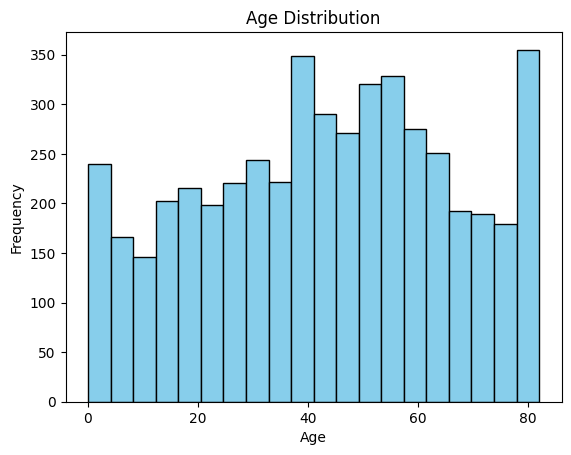

In [9]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [10]:
health_care_df['age'] = health_care_df['age'].round()

In [11]:
health_care_df['age'].unique()

array([67., 61., 80., 49., 79., 81., 74., 69., nan, 78., 54., 50., 64.,
       75., 60., 57., 71., 52., 65., 58., 42., 82., 48., 72., 63., 76.,
       39., 77., 73., 56., 45., 70., 59., 66., 51., 68., 47., 53., 38.,
       55.,  1., 46., 32., 14.,  3.,  8., 37., 40., 35., 20., 44., 25.,
       23., 17., 13.,  4., 16., 22., 27., 43., 30., 29., 11., 21., 18.,
       33., 24., 34., 36., 41.,  5., 26., 31., 12., 62.,  2.,  7.,  9.,
       15., 28., 10.,  0., 19.,  6.])

In [12]:
health_care_df['age'] = health_care_df['age'].fillna(health_care_df['age'].mean())

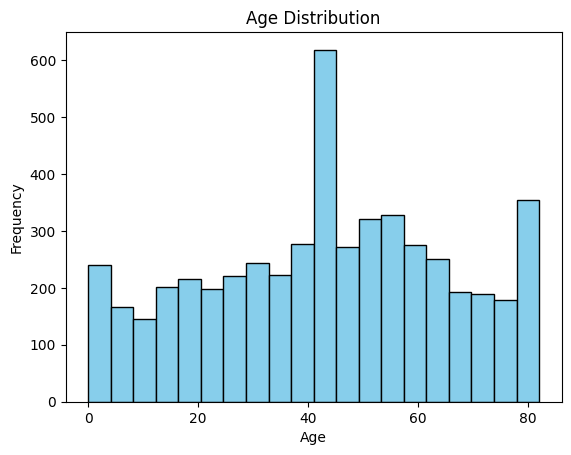

In [13]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [14]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', nan, 'Govt_job', 'children',
       'Never_worked'], dtype=object)

In [15]:
health_care_df['work_type'].value_counts()

work_type
Private          2840
Self-employed     793
children          662
Govt_job          640
Never_worked       22
Name: count, dtype: int64

In [16]:
health_care_df['work_type'].isnull().sum()

np.int64(153)

In [17]:
health_care_df['work_type'] = health_care_df['work_type'].fillna(health_care_df['work_type'].mode()[0])

In [18]:
health_care_df['work_type'].isnull().sum()

np.int64(0)

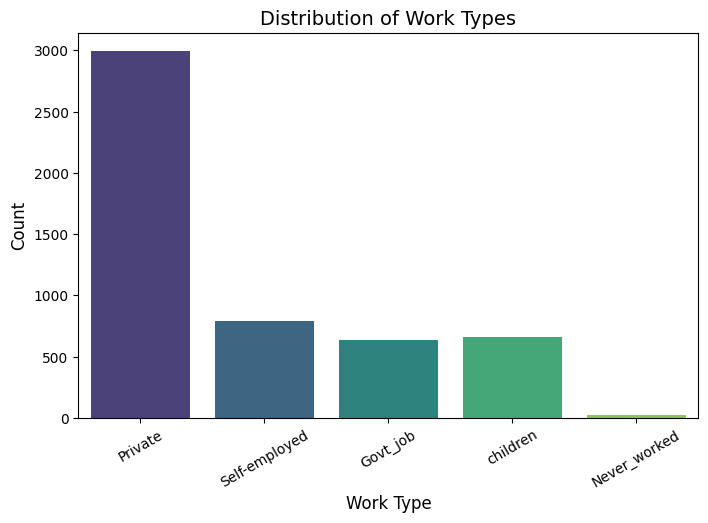

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='work_type', data=health_care_df, palette='viridis', hue='work_type', legend=False)
plt.title("Distribution of Work Types", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.show()

In [20]:
health_care_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  4854 non-null   float64
 8   bmi                4665 non-null   float64
 9   smoking_status     4957 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
health_care_df["avg_glucose_level"] = health_care_df["avg_glucose_level"].fillna(health_care_df["avg_glucose_level"].median())


In [22]:
health_care_df['avg_glucose_level'].describe()

count    5110.000000
mean      105.392873
std        44.270397
min        55.120000
25%        77.930000
50%        91.820000
75%       112.325000
max       271.740000
Name: avg_glucose_level, dtype: float64

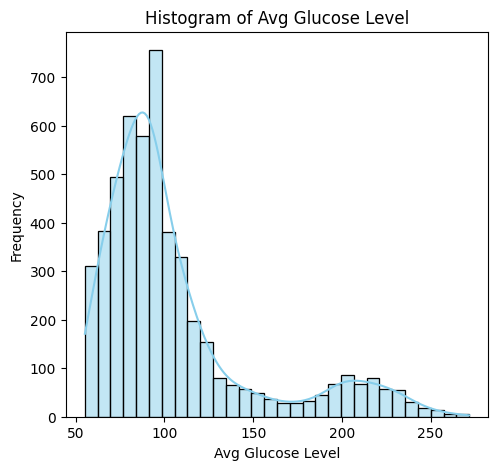

<Figure size 600x500 with 0 Axes>

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(health_care_df['avg_glucose_level'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Frequency")
plt.figure(figsize=(6,5))
plt.tight_layout()
plt.show()


In [24]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4665 non-null   float64
 9   smoking_status     4957 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [25]:
health_care_df['bmi'] = health_care_df['bmi'].fillna(health_care_df['bmi'].median())

In [26]:
Q1 = health_care_df['bmi'].quantile(0.25)
Q3 = health_care_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR
print(l)
print(u)
outliers = (health_care_df['bmi']<l) |(health_care_df['bmi']>u)
health_care_df['bmi'] = np.where(outliers, health_care_df['bmi'].median(), health_care_df['bmi'])

11.500000000000004
45.099999999999994


In [27]:
health_care_df['bmi'].describe()

count    5110.000000
mean       28.161448
std         6.242514
min        12.000000
25%        24.100000
50%        28.100000
75%        31.800000
max        45.000000
Name: bmi, dtype: float64

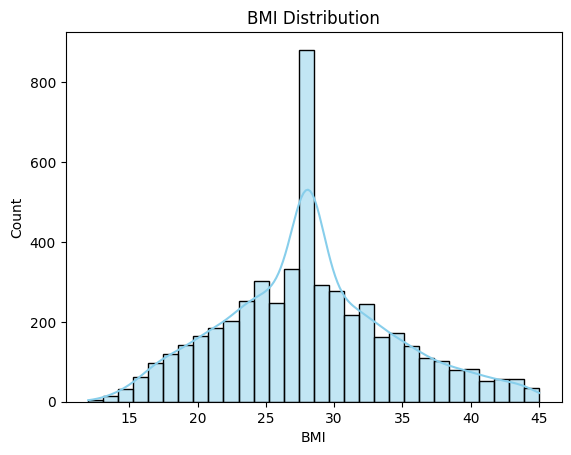

In [28]:
sns.histplot(health_care_df['bmi'], bins=30, kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


In [29]:
health_care_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       153
stroke                 0
dtype: int64

In [30]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       1835
Unknown            1492
formerly smoked     864
smokes              766
Name: count, dtype: int64

In [31]:
health_care_df.loc[health_care_df['age'] < 16, 'smoking_status'] = "never smoked"

In [32]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       2455
Unknown             894
formerly smoked     845
smokes              763
Name: count, dtype: int64

In [33]:
health_care_df['smoking_status']=health_care_df['smoking_status'].fillna("Unknown")

In [34]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       2455
Unknown            1047
formerly smoked     845
smokes              763
Name: count, dtype: int64

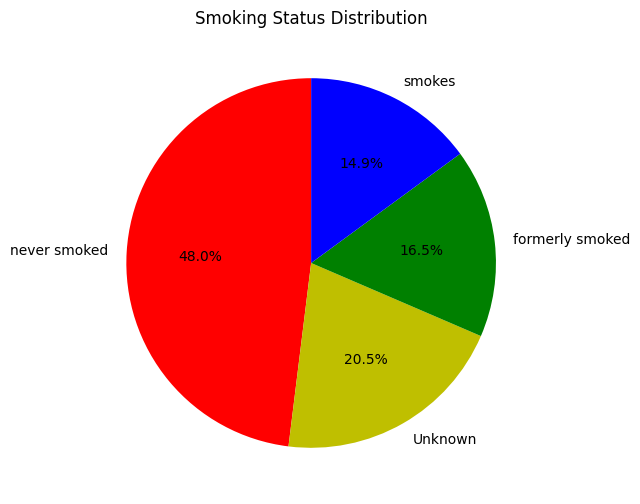

In [35]:
health_care_df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=["r","y","g","b"], startangle=90, figsize=(6,6))
plt.title("Smoking Status Distribution")
plt.ylabel("")  # Remove y-label for cleaner look
plt.show()


In [36]:
health_care_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Feature Engineering

In [37]:
def classify_age(age):
    if age < 40:
        return  "Young"
    elif age < 60:
        return  "Middle-aged"
    else:
        return  "Elderly"

health_care_df['age_category'] = health_care_df['age'].apply(classify_age)


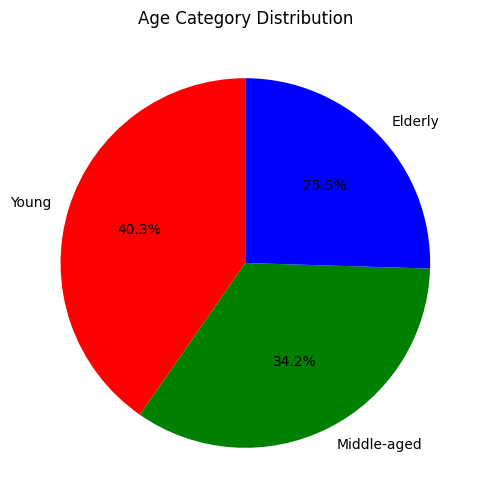

In [38]:
plt.figure(figsize=(6, 6))
colors = ["r", "g", "b"]
health_care_df["age_category"].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors, startangle=90
)
plt.title("Age Category Distribution")
plt.ylabel("")  
plt.show()

In [39]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return " Normal Weight"
    elif bmi < 30:
        return  "Overweight"
    else:
        return "Obese" 

health_care_df['bmi_category'] = health_care_df['bmi'].apply(classify_bmi)


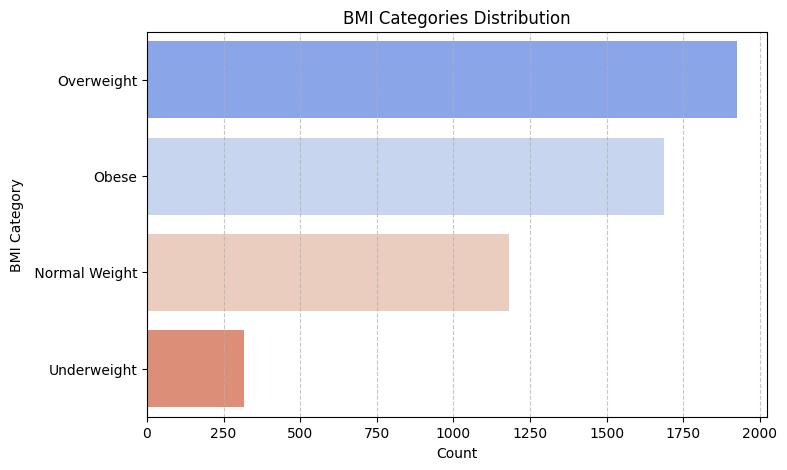

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=health_care_df["bmi_category"].value_counts().values, 
    y=health_care_df["bmi_category"].value_counts().index, 
    hue=health_care_df["bmi_category"].value_counts().index, 
     
    palette="coolwarm"
)
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.title("BMI Categories Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [41]:
def categorize_glucose(value):
    if value < 70:
        return  "Low"
    elif 70 <= value <= 99:
        return "Normal"
    elif 100 <= value <= 125:
        return  "Prediabetes"
    elif 126 <= value <= 199:
        return "Diabetes"
    else:
        return "Severe Diabetes"

health_care_df["glucose_category"] = health_care_df["avg_glucose_level"].apply(categorize_glucose)




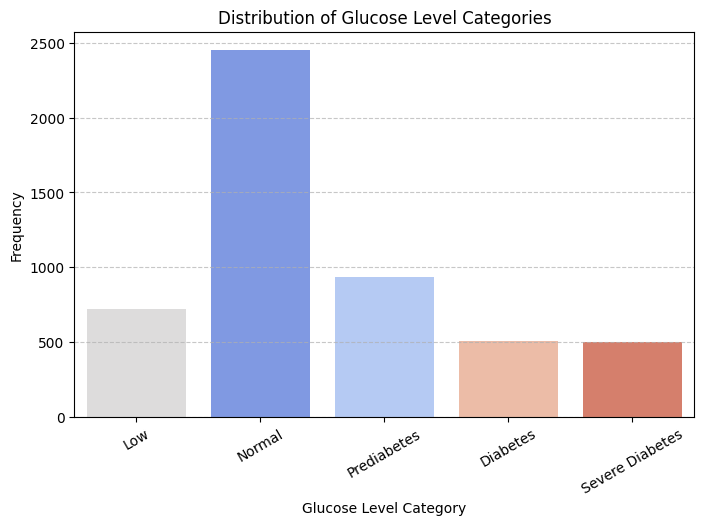

In [42]:
category_order = ["Low", "Normal", "Prediabetes", "Diabetes", "Severe Diabetes"]


category_counts = health_care_df["glucose_category"].value_counts()


category_df = category_counts.reset_index()
category_df.columns = ["glucose_category", "count"]


plt.figure(figsize=(8, 5))
sns.barplot(data=category_df, x="glucose_category", y="count", hue="glucose_category", palette="coolwarm", order=category_order, legend=False)


plt.xlabel("Glucose Level Category")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Level Categories")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Encoding

In [43]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  age_category       5110 non-null   object 
 12  bmi_category       5110 non-null   object 
 13  glucose_category   5110 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 559.0+ KB


In [44]:
health_care_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
age_category          object
bmi_category          object
glucose_category      object
dtype: object

In [45]:
health_care_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [46]:
map_gender = {'Male' : 0b00 ,'Female': 0b01 ,'Other': 0b10}
health_care_df['gender'] = health_care_df['gender'].map(map_gender)

In [47]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [48]:
map_work_type = {'Private' : 0, 'Self-employed' : 1 , 'Govt_job' : 2 , 'children' : 3 , 'Never_worked' : 4}
health_care_df['work_type'] = health_care_df['work_type'].map(map_work_type)

In [49]:
health_care_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
map_ever_married = {'Yes': 1,'No' : 0 }
health_care_df['ever_married'] =health_care_df['ever_married'].map(map_ever_married)

In [51]:
health_care_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [52]:
map_residence_type = {'Urban' : 0 , 'Rural' : 1}
health_care_df['Residence_type'] =health_care_df['Residence_type'].map(map_residence_type)

In [53]:
health_care_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [54]:
map_smoking_status = {'formerly smoked' : 0 , 'never smoked' : 1 , 'smokes' : 2,'Unknown':-1}
health_care_df['smoking_status'] =health_care_df['smoking_status'].map(map_smoking_status)

In [55]:
health_care_df['age_category'].unique()

array(['Elderly', 'Middle-aged', 'Young'], dtype=object)

In [56]:
map_age_category={"Young":0,'Middle-aged':1,'Elderly':2}
health_care_df['age_category']=health_care_df['age_category'].map(map_age_category)

In [57]:
health_care_df['glucose_category'].unique()

array(['Severe Diabetes', 'Prediabetes', 'Diabetes', 'Normal', 'Low'],
      dtype=object)

In [58]:
map_glucose_category={'Low':0,'Normal':1,'Diabetes':2, 'Prediabetes':3,'Severe Diabetes':4}
health_care_df['glucose_category']=health_care_df['glucose_category'].map(map_glucose_category)

In [59]:
health_care_df['bmi_category'].unique()

array(['Obese', 'Overweight', ' Normal Weight', 'Underweight'],
      dtype=object)

In [60]:
map_bmi_category={'Obese':3, 'Overweight':2, ' Normal Weight':1, 'Underweight':0}
health_care_df['bmi_category']=health_care_df['bmi_category'].map(map_bmi_category)

In [61]:
health_care_df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
age_category           int64
bmi_category           int64
glucose_category       int64
dtype: object

In [62]:
health_care_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.230326,0.097456,0.054012,0.656164,0.811546,0.491977,105.392873,28.161448,0.574168,0.048728,0.851468,1.975147,1.616047
std,0.492941,22.014411,0.296607,0.226063,0.475034,1.110240,0.499985,44.270397,6.242514,0.976269,0.215320,0.797611,0.898863,1.211826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.930000,24.100000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,43.230326,0.000000,0.000000,1.000000,0.000000,0.000000,91.820000,28.100000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,112.325000,31.800000,1.000000,0.000000,2.000000,3.000000,3.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,45.000000,2.000000,1.000000,2.000000,3.000000,4.000000


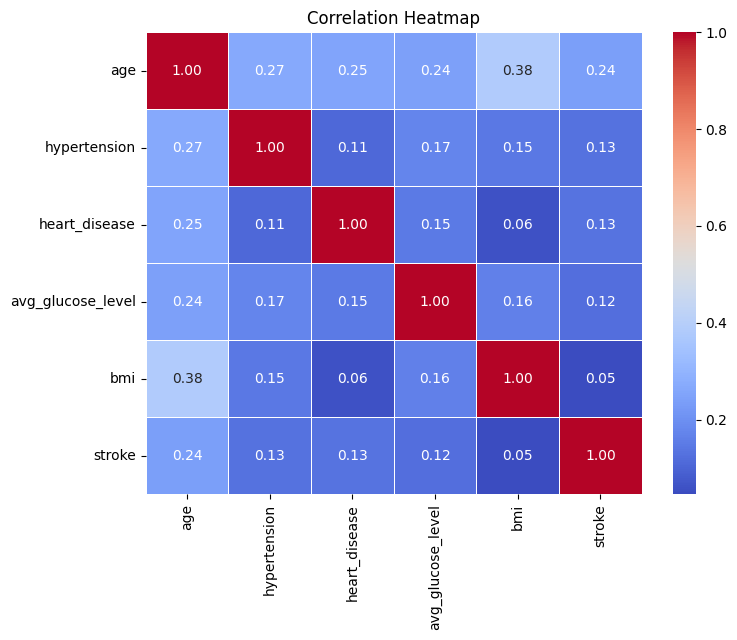

In [63]:

numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = health_care_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Normalization

In [64]:
scaler = MinMaxScaler()
health_care_df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(health_care_df[['age', 'avg_glucose_level', 'bmi']])

# Age , Avg_glucose_level , Bmi is normalized from 0 -> 1

In [65]:
health_care_df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,0.527199,0.097456,0.054012,0.656164,0.811546,0.491977,0.232079,0.489741,0.574168,0.048728,0.851468,1.975147,1.616047
std,0.492941,0.268468,0.296607,0.226063,0.475034,1.110240,0.499985,0.204369,0.189167,0.976269,0.215320,0.797611,0.898863,1.211826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.317073,0.000000,0.000000,0.000000,0.000000,0.000000,0.105300,0.366667,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.527199,0.000000,0.000000,1.000000,0.000000,0.000000,0.169421,0.487879,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,0.731707,0.000000,0.000000,1.000000,2.000000,1.000000,0.264080,0.600000,1.000000,0.000000,2.000000,3.000000,3.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,4.000000


In [66]:
health_care_df.to_csv("cleaned_data.csv", index=False)

# visualizations 


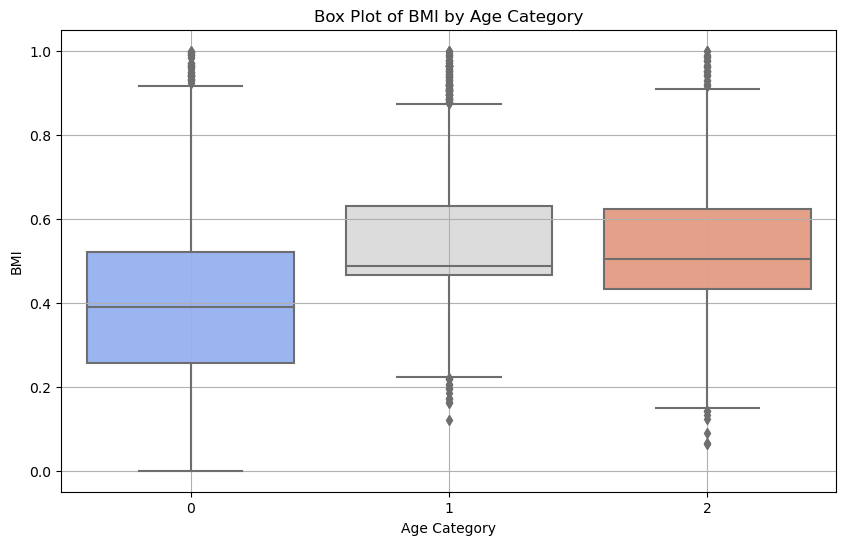

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data= health_care, x='age_category', y='bmi',palette='coolwarm')
plt.title('Box Plot of BMI by Age Category')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

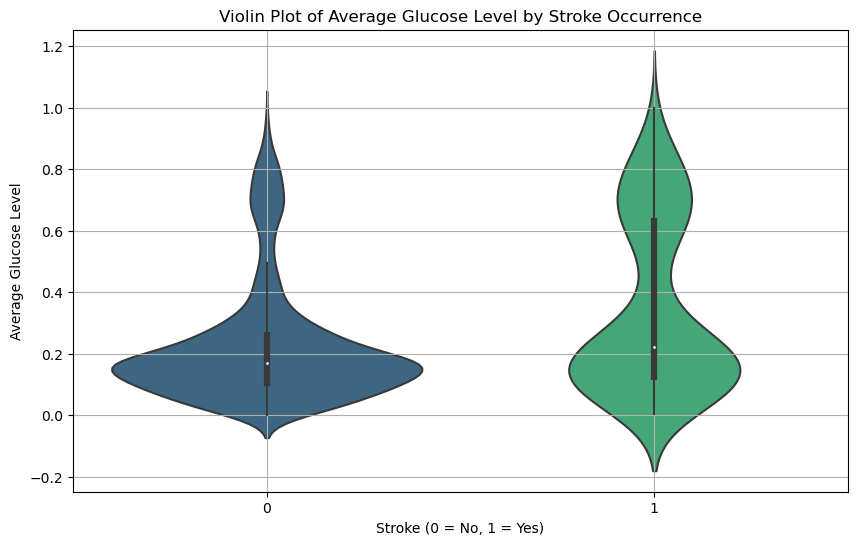

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=health_care_df,x='stroke',y='avg_glucose_level',palette='viridis')
plt.title('Average Glucose Level by Stroke Occurrence')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()

In [25]:

health_care_df.columns = health_care_df.columns.str.strip()


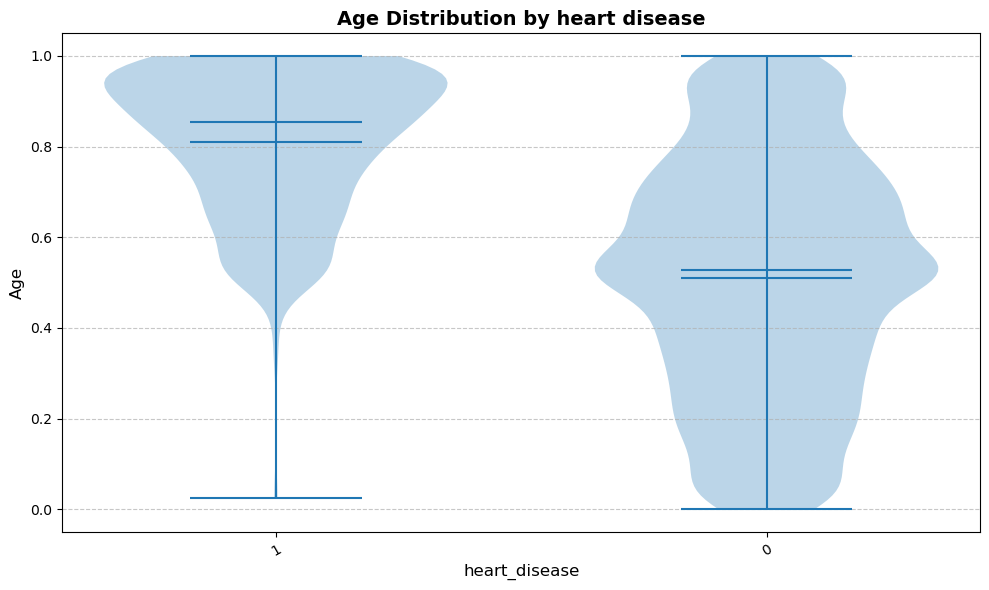

In [33]:
categories = health_care_df['heart_disease'].unique()
data_to_plot = [health_care_df.loc[health_care_df['heart_disease'] == cat, 'age']for cat in categories]
plt.figure(figsize=(10, 6))
plt.violinplot(data_to_plot,showmeans=True,showmedians=True,widths=0.7)
plt.xticks(range(1, len(categories) + 1), categories, rotation=30)
plt.title('Age Distribution by heart disease', fontsize=14, fontweight='bold')
plt.xlabel('heart_disease', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


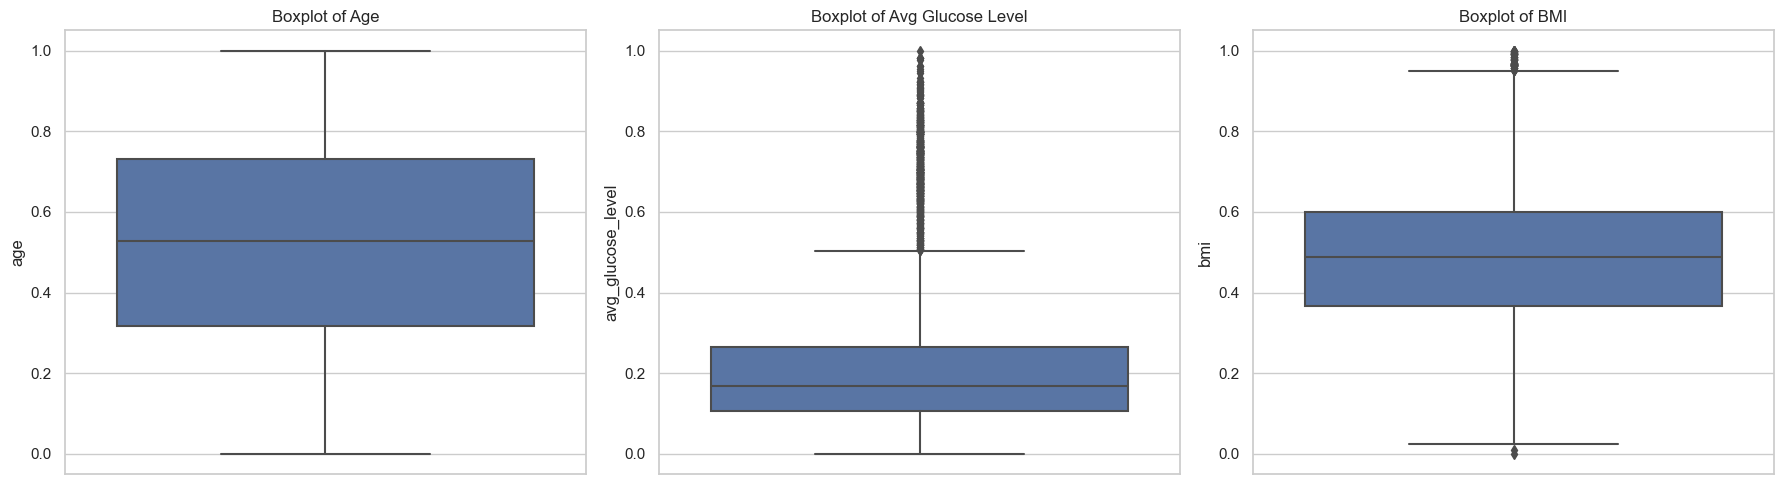

In [34]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["age"], ax=axes[0])
axes[0].set_title("Boxplot of Age")
sns.boxplot(y=df["avg_glucose_level"], ax=axes[1])
axes[1].set_title("Boxplot of Avg Glucose Level")
sns.boxplot(y=df["bmi"], ax=axes[2])
axes[2].set_title("Boxplot of BMI")
plt.tight_layout()
plt.show()


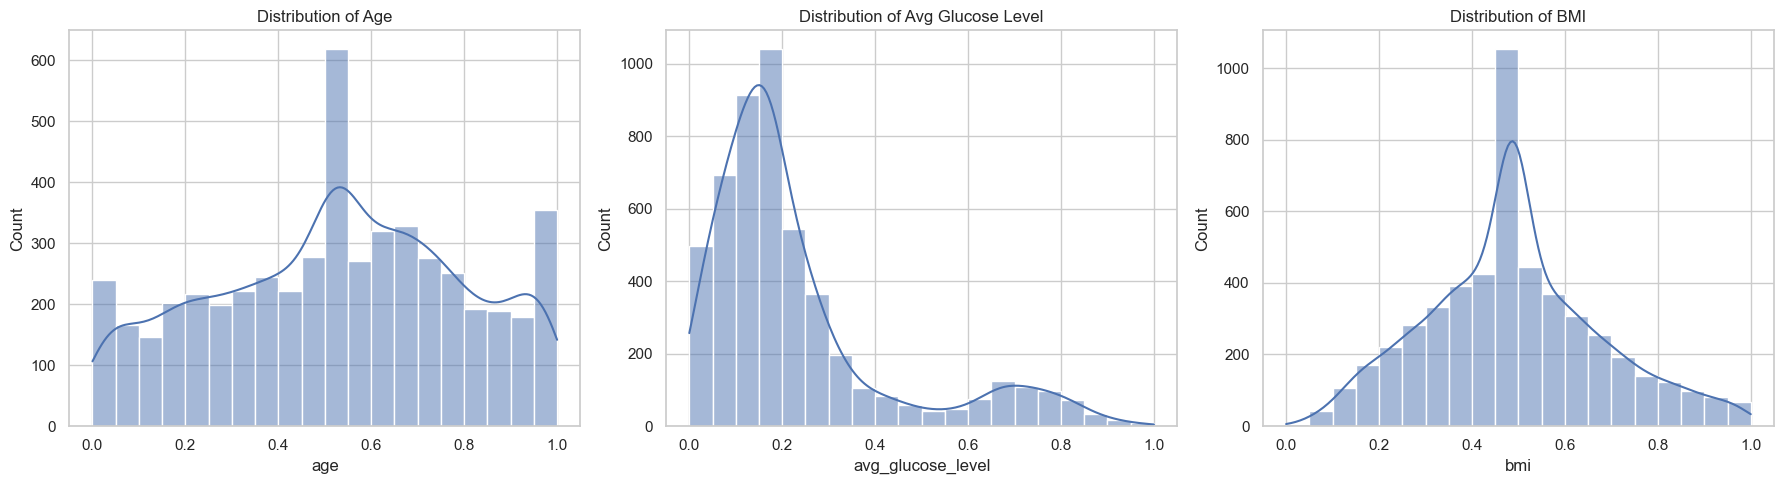

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Age")
sns.histplot(df["avg_glucose_level"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Avg Glucose Level")
sns.histplot(df["bmi"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of BMI")
plt.tight_layout()
plt.show()


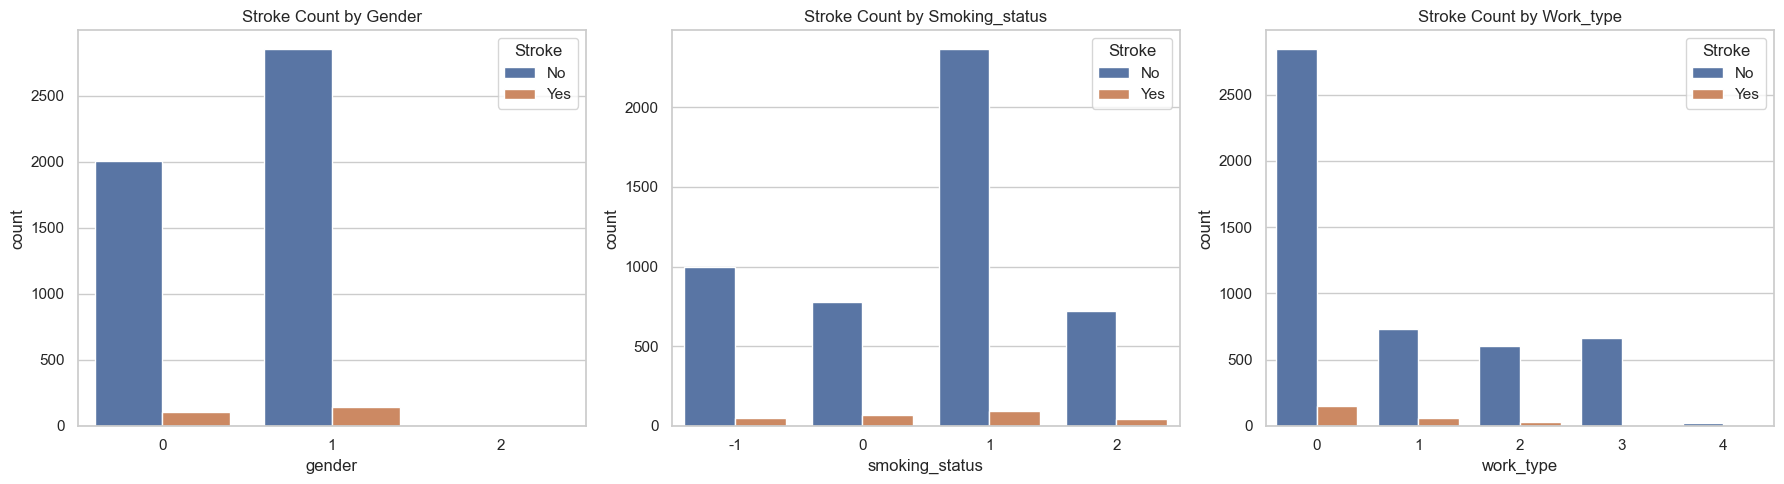

In [36]:
categorical_features = ["gender", "smoking_status", "work_type"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue="stroke", ax=axes[i])
    axes[i].set_title(f"Stroke Count by {feature.capitalize()}")
    axes[i].legend(title="Stroke", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


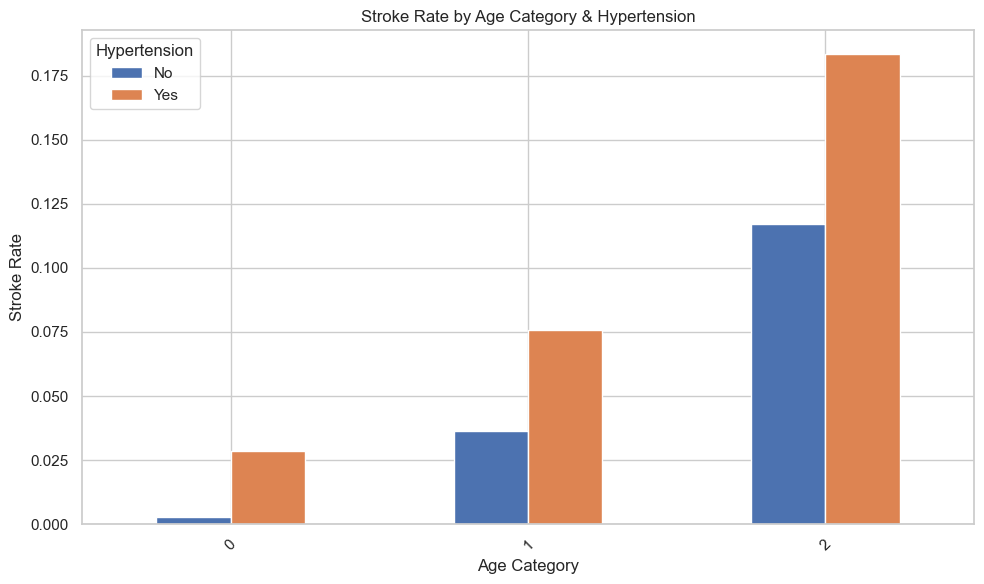

In [37]:
grouped = df.groupby(['age_category', 'hypertension'])['stroke'].mean().reset_index()
pivot_df = grouped.pivot(index='age_category', columns='hypertension', values='stroke')
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Stroke Rate by Age Category & Hypertension')
plt.xlabel('Age Category')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=45)
plt.legend(title='Hypertension', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

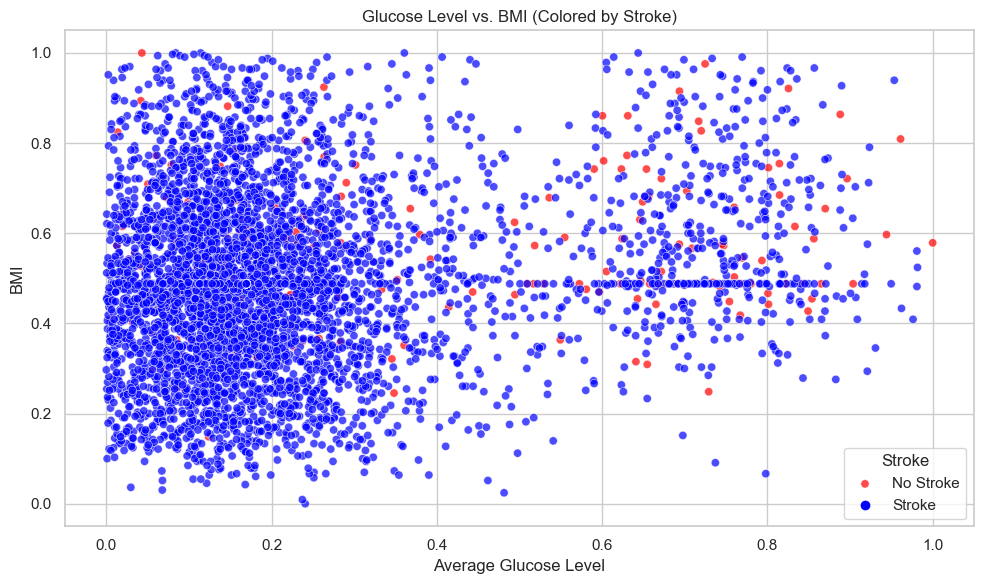

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='avg_glucose_level',y='bmi',hue='stroke',palette={0: 'blue', 1: 'red'},alpha=0.7)
plt.title('Glucose Level vs. BMI (Colored by Stroke)')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.grid(True)
plt.tight_layout()
plt.show()

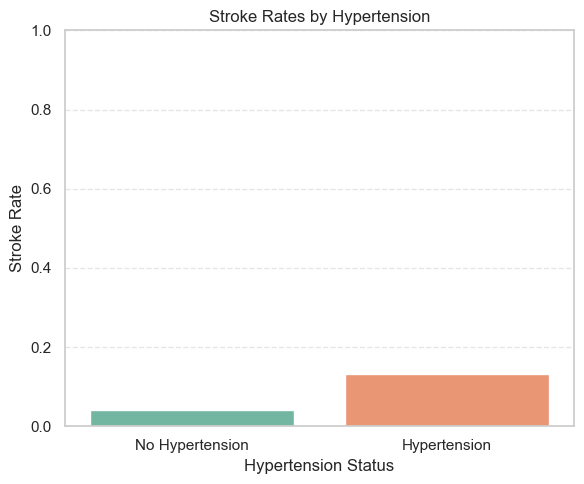

In [46]:
df['stroke'] = df['stroke'].astype(int)
stroke_rates = df.groupby('hypertension')['stroke'].mean().reset_index()
stroke_rates['hypertension'] = stroke_rates['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})
plt.figure(figsize=(6, 5))
sns.barplot(data=stroke_rates, x='hypertension', y='stroke', palette='Set2')
plt.title('Stroke Rates by Hypertension')
plt.ylabel('Stroke Rate')
plt.xlabel('Hypertension Status')
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

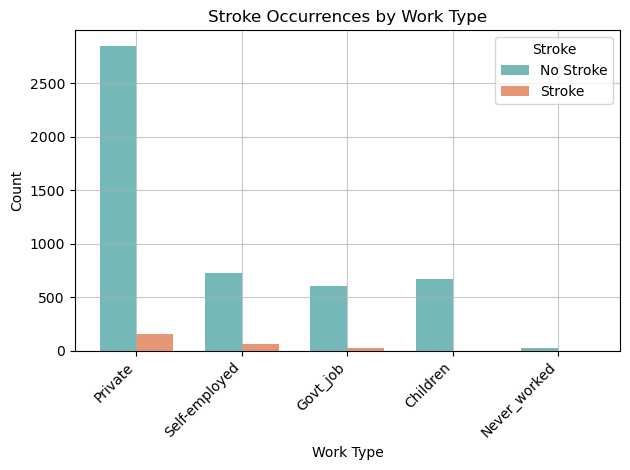

In [ ]:

import numpy as np
import pandas as pd


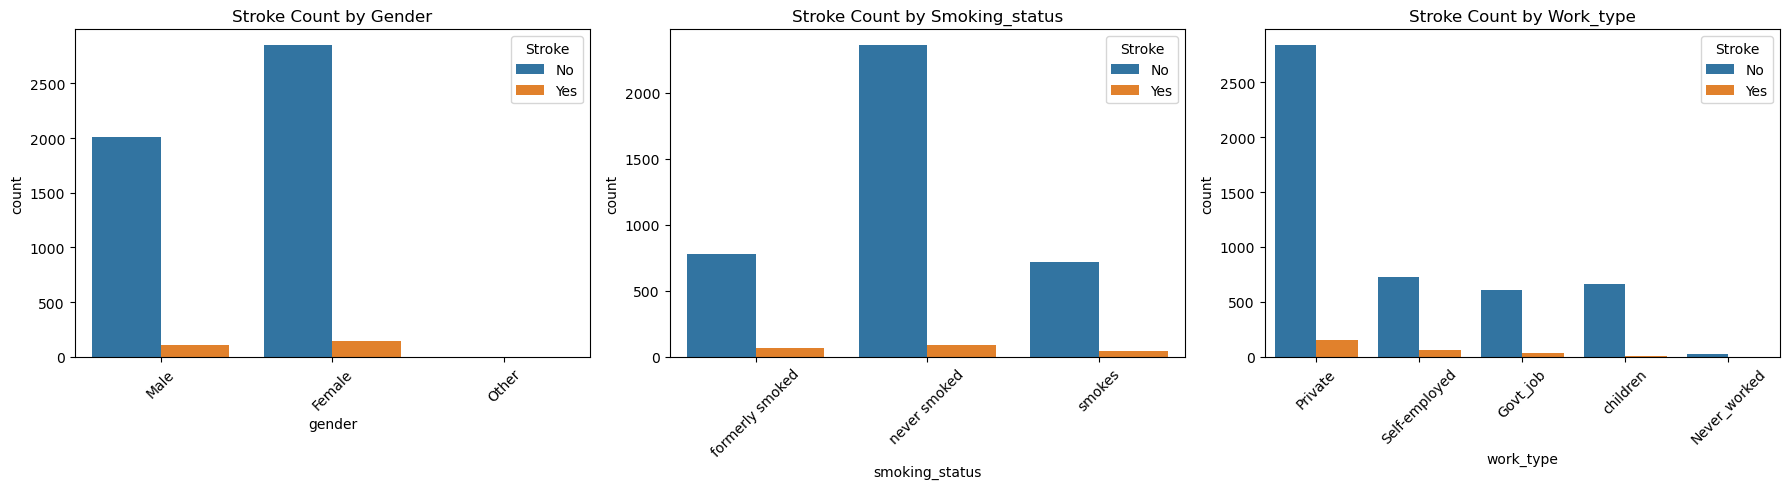

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\S\Downloads\healthcare_dataset.csv")  
df["gender"] = df["gender"].map({0: "Male", 1: "Female", 2: "Other"})
df["work_type"] = df["work_type"].map({ 0: "Private", 1: "Self-employed", 2: "Govt_job", 3: "children", 4: "Never_worked"})
df["smoking_status"] = df["smoking_status"].map({0: "formerly smoked", 1: "never smoked", 2: "smokes", 3: "Unknown"})
categorical_features = ["gender", "smoking_status", "work_type"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue="stroke", ax=axes[i])
    axes[i].set_title(f"Stroke Count by {feature.capitalize()}")
    axes[i].legend(title="Stroke", labels=["No", "Yes"])
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


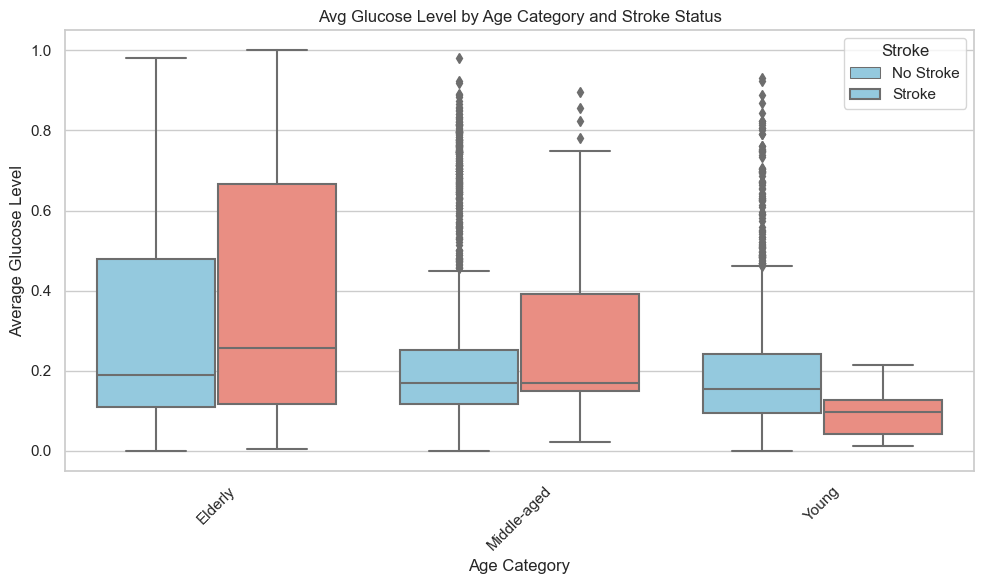

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


df["age_category"] = df["age_category"].map({ 0: "Young", 1: "Middle-aged", 2: "Elderly"})
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df,x='age_category',y='avg_glucose_level',hue='stroke',palette={0: 'skyblue', 1: 'salmon'})
plt.title('Avg Glucose Level by Age Category and Stroke Status')
plt.xlabel('Age Category')
plt.ylabel('Average Glucose Level')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


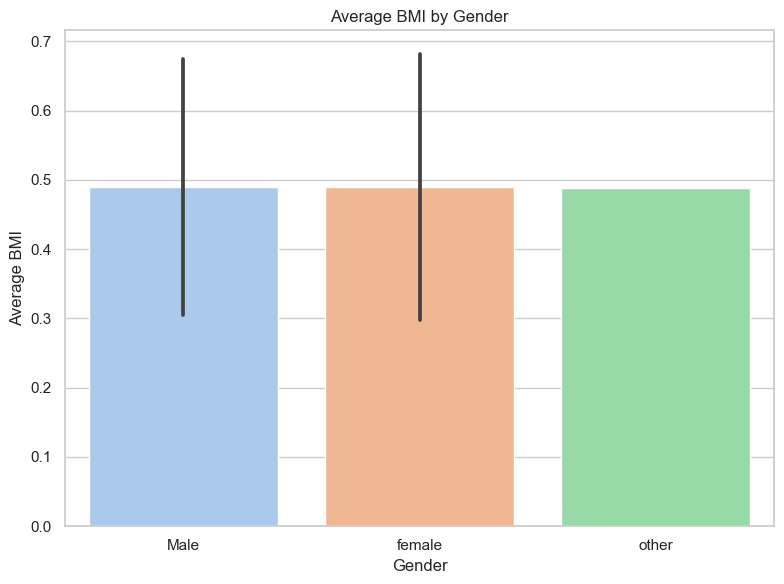

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['gender'] = df['gender'].replace({0: 'Male' , 1: 'female' , 2: 'other'})
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(data=df, x='gender', y='bmi', palette='pastel', errorbar='sd')
plt.title('Average BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('Average BMI')
plt.tight_layout()
plt.show()

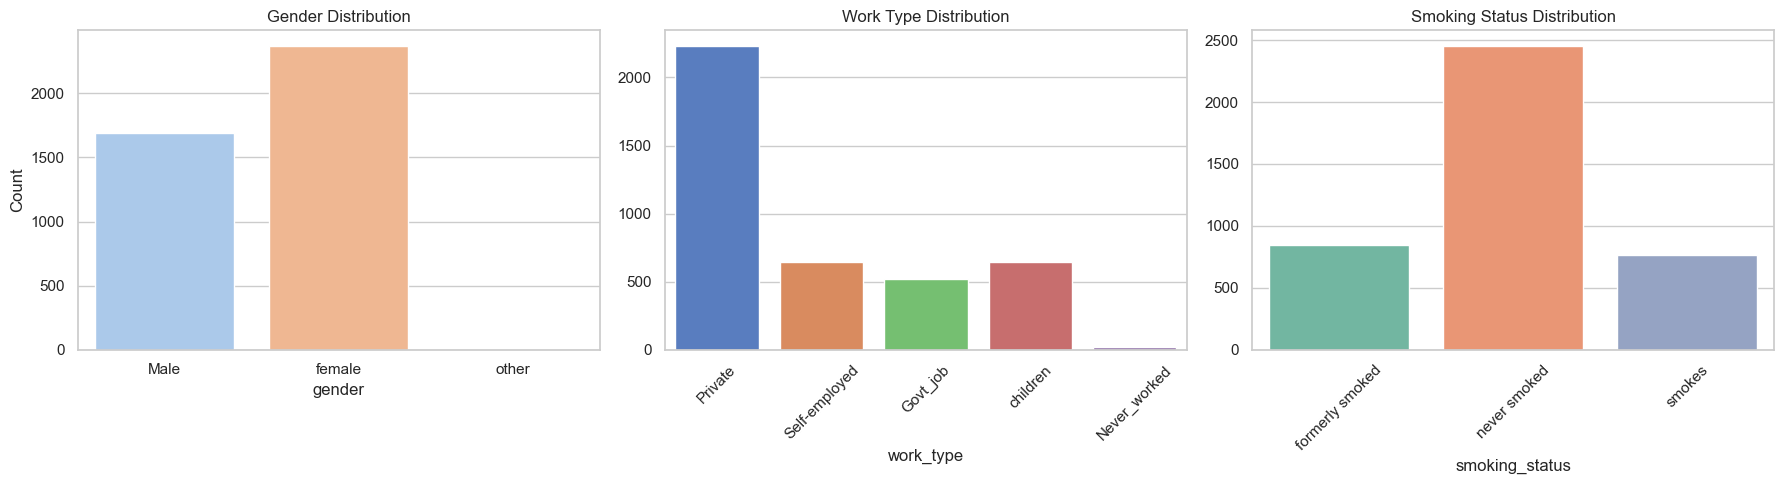

In [11]:
if df['gender'].dtype != 'O':
    df['gender'] = df['gender'].map({0: 'Male', 1: 'Female', 2: 'Other'})

if df['work_type'].dtype != 'O':
    df['work_type'] = df['work_type'].map({0: 'Private',1: 'Self-employed',2: 'Govt_job',3: 'children',4: 'Never_worked'})

if df['smoking_status'].dtype != 'O':
    df['smoking_status'] = df['smoking_status'].map({0: 'formerly smoked',1: 'never smoked',2: 'smokes',3: 'Unknown'})

df = df.dropna(subset=['gender', 'work_type', 'smoking_status'])
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set(style="whitegrid")
sns.countplot(ax=axes[0], data=df, x='gender', palette='pastel')
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('Count')
sns.countplot(ax=axes[1], data=df, x='work_type', palette='muted')
axes[1].set_title('Work Type Distribution')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[2], data=df, x='smoking_status', palette='Set2')
axes[2].set_title('Smoking Status Distribution')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
